In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 
import glob

# Camera Calibration

In [3]:
images = glob.glob('camera_cal/calibration*.jpg')
images

['camera_cal/calibration5.jpg',
 'camera_cal/calibration4.jpg',
 'camera_cal/calibration6.jpg',
 'camera_cal/calibration7.jpg',
 'camera_cal/calibration3.jpg',
 'camera_cal/calibration2.jpg',
 'camera_cal/calibration1.jpg',
 'camera_cal/calibration20.jpg',
 'camera_cal/calibration19.jpg',
 'camera_cal/calibration18.jpg',
 'camera_cal/calibration15.jpg',
 'camera_cal/calibration14.jpg',
 'camera_cal/calibration16.jpg',
 'camera_cal/calibration17.jpg',
 'camera_cal/calibration13.jpg',
 'camera_cal/calibration12.jpg',
 'camera_cal/calibration10.jpg',
 'camera_cal/calibration11.jpg',
 'camera_cal/calibration9.jpg',
 'camera_cal/calibration8.jpg']

In [5]:
nx = 9
ny = 6

In [6]:
imgpoints = [] # 2D points in image plane
objpoints = [] # 3D points in real world space

In [7]:
objp = np.zeros((ny*nx, 3), np.float32)
objp.shape

(54, 3)

In [8]:
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [8., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [8., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [8., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [8., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [8., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5

In [9]:
for fname in images:
    img = cv2.imread(fname)
#     plt.imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     plt.imshow(gray)
    
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

#         img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
#         plt.imshow(img)

In [10]:
gray.shape, gray.shape[::-1]

((720, 1280), (1280, 720))

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [12]:
ret

1.0298153371058978

In [13]:
mtx

array([[1.15777930e+03, 0.00000000e+00, 6.67111054e+02],
       [0.00000000e+00, 1.15282291e+03, 3.86128938e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [14]:
dist

array([[-0.24688775, -0.02373133, -0.00109842,  0.00035108, -0.00258571]])

In [31]:
img = mpimg.imread('camera_cal/calibration1.jpg')

In [32]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

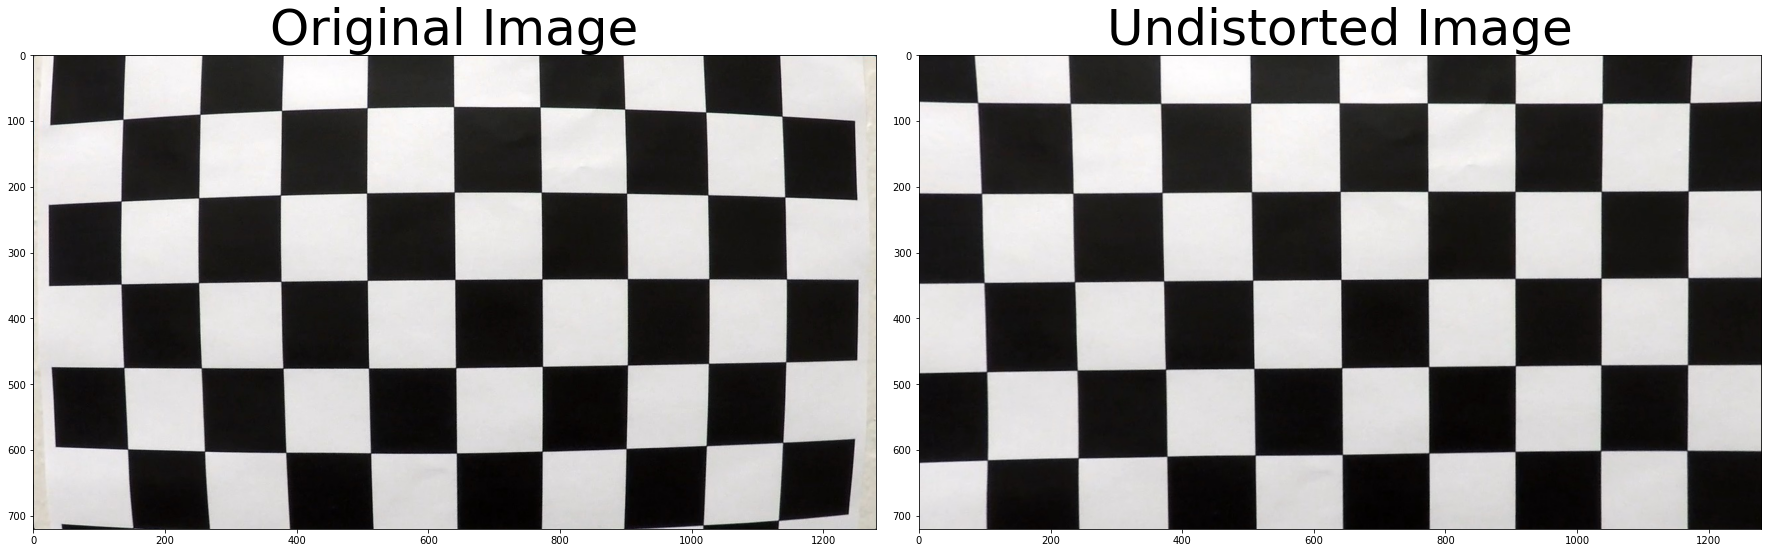

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Distortion Correction

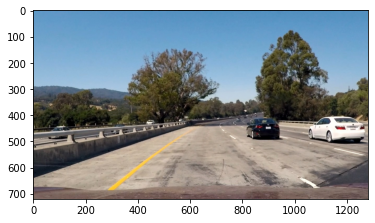

In [28]:
img = mpimg.imread('test_images/test1.jpg')
plt.imshow(img)

In [29]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

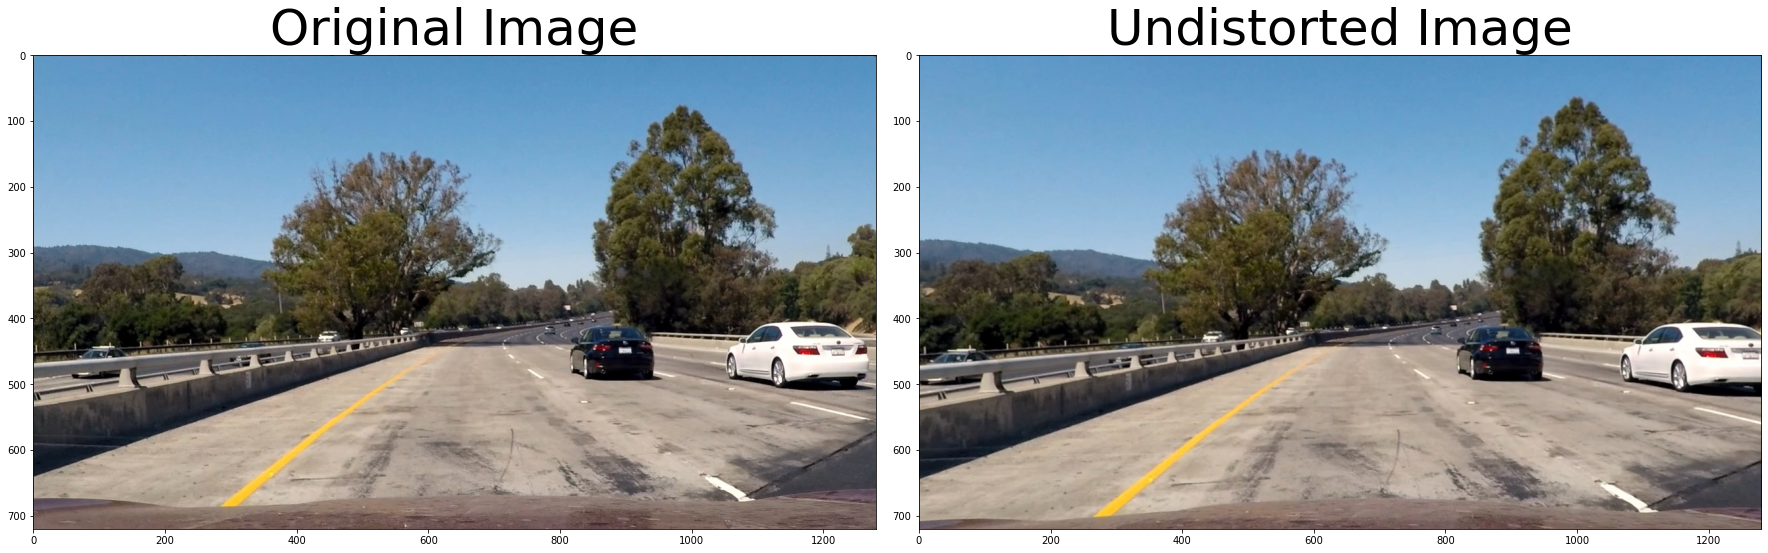

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)